In [1]:
%pylab inline
import glob
import seaborn as sbn
sbn.set_style("ticks")
sbn.set_context("notebook", font_scale = 2)

Populating the interactive namespace from numpy and matplotlib


### Running Analysis

### using cmd line analyse_freenrg

#### unbound

In [2]:
!analyse_freenrg mbar -i bound/lambda-*/simfile.dat -o bound.dat --subsampling -p 90

Starting analyse_freenrg: number of threads equals 48

Simulation data is analysed using the python module pymbar
----------------------------------------------------------
# Writing all output to file bound.dat
#Lambda array was not given, trying to infer lambda values from simulation files...
working on input file bound/lambda-0.0/simfile.dat
working on input file bound/lambda-0.1/simfile.dat
working on input file bound/lambda-0.2/simfile.dat
working on input file bound/lambda-0.3/simfile.dat
working on input file bound/lambda-0.4/simfile.dat
working on input file bound/lambda-0.5/simfile.dat
working on input file bound/lambda-0.6/simfile.dat
working on input file bound/lambda-0.7/simfile.dat
working on input file bound/lambda-0.8/simfile.dat
working on input file bound/lambda-0.9/simfile.dat
working on input file bound/lambda-1.0/simfile.dat

Respecting your privacy - not sending usage statistics.
Please see http://siremol.org/analytics for more information.

#Subsampling energies a

In [3]:
!analyse_freenrg mbar -i unbound/lambda-*/simfile.dat -o unbound.dat --subsampling -p 90

Starting analyse_freenrg: number of threads equals 48

Simulation data is analysed using the python module pymbar
----------------------------------------------------------
# Writing all output to file unbound.dat
#Lambda array was not given, trying to infer lambda values from simulation files...
working on input file unbound/lambda-0.0/simfile.dat
working on input file unbound/lambda-0.1/simfile.dat
working on input file unbound/lambda-0.2/simfile.dat
working on input file unbound/lambda-0.3/simfile.dat
working on input file unbound/lambda-0.4/simfile.dat
working on input file unbound/lambda-0.5/simfile.dat
working on input file unbound/lambda-0.6/simfile.dat
working on input file unbound/lambda-0.7/simfile.dat
working on input file unbound/lambda-0.8/simfile.dat
working on input file unbound/lambda-0.9/simfile.dat
working on input file unbound/lambda-1.0/simfile.dat

Respecting your privacy - not sending usage statistics.
Please see http://siremol.org/analytics for more information.


In [4]:
#helper function to extract DG from the freenrg_analysis generated files. 
def get_nth_line(fname, line):
    fh = open (fname, 'r')
    lineList = fh.readlines()
    fh.close()
    return lineList[line].split(',')

In [5]:
bound_mbar = get_nth_line('bound.dat', -3)
bound_ti = get_nth_line('bound.dat', -1)

unbound_mbar = get_nth_line('unbound.dat', -3)
unbound_ti = get_nth_line('unbound.dat', -1)

#mbar
DG_bound_mbar = float(bound_mbar[0])
DG_unbound_mbar = float(unbound_mbar[0])
DG_bound_mbar_error = float(bound_mbar[1])
DG_unbound_mbar_error = float(unbound_mbar[1])

#ti
#DG_bound_ti = float(bound_ti[0])
DG_bound_ti = float(bound_ti[0].split()[0])
DG_unbound_ti = float(unbound_ti[0])
#DG_bound_ti_error = float(bound_ti[1])
#DG_bound_ti_error = float(bound_ti[1].split()[0])
#DG_unbound_ti_error = float(unbound_ti[1])

In [6]:
DG_bound_mbar - DG_unbound_mbar

1.660473

In [7]:
DG_bound_ti - DG_unbound_ti

2.08908

### Comparing PMF of MBAR and TI for Bound perturbations

In [8]:
import numpy as np
#Let's read the free.dat file
fh = open ('bound.dat', 'r')
lines = fh.readlines()
fh.close()
#Now we need to find the PMF in the file
#Let's loop over the lines and extract the data
count = 0
num_lambdas = 11
pmf_mbar = []
pmf_ti = []
for line in lines:
    if line.startswith('#PMF from MBAR'):
        pmf_mbar = lines[(count+1):(count+1+num_lambdas)]
    if line.startswith('#PMF from TI'):
        pmf_ti = lines[(count+1):(count+1+num_lambdas)]
    count = count +1
for i in range(len(pmf_mbar)):
    temp = pmf_mbar[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    pmf_mbar[i] = float_temp
pmf_mbar =np.array(pmf_mbar)

for i in range(len(pmf_ti)):
    temp = pmf_ti[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    pmf_ti[i] = float_temp
pmf_ti =np.array(pmf_ti)

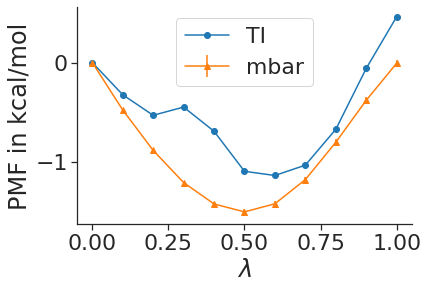

In [9]:
plot(pmf_ti[:,0], pmf_ti[:,1], marker = 'o', label='TI')
errorbar(pmf_mbar[:,0], pmf_mbar[:,1], yerr=pmf_mbar[:,2], marker = '^', label='mbar')
xlabel(r'$\lambda$')
ylabel('PMF in kcal/mol')
legend()
sbn.despine()

### Comparing PMF of MBAR and TI for unbound perturbations

In [10]:
import numpy as np
#Let's read the free.dat file
fh = open ('unbound.dat', 'r')
lines = fh.readlines()
fh.close()
#Now we need to find the PMF in the file
#Let's loop over the lines and extract the data
count = 0
num_lambdas = 11
pmf_mbar = []
pmf_ti = []
for line in lines:
    if line.startswith('#PMF from MBAR'):
        pmf_mbar = lines[(count+1):(count+1+num_lambdas)]
    if line.startswith('#PMF from TI'):
        pmf_ti = lines[(count+1):(count+1+num_lambdas)]
    count = count +1
for i in range(len(pmf_mbar)):
    temp = pmf_mbar[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    pmf_mbar[i] = float_temp
pmf_mbar =np.array(pmf_mbar)

for i in range(len(pmf_ti)):
    temp = pmf_ti[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    pmf_ti[i] = float_temp
pmf_ti =np.array(pmf_ti)

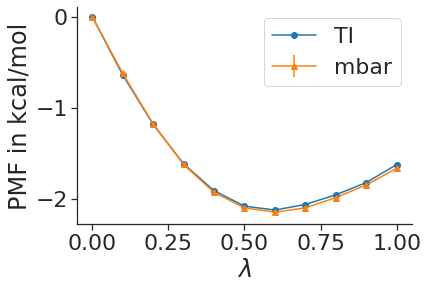

In [11]:
plot(pmf_ti[:,0], pmf_ti[:,1], marker = 'o', label='TI')
errorbar(pmf_mbar[:,0], pmf_mbar[:,1], yerr=pmf_mbar[:,2], marker = '^', label='mbar')
xlabel(r'$\lambda$')
ylabel('PMF in kcal/mol')
legend()
sbn.despine()

#### Plotting the average gradient

In [12]:
## extracting gradient data
count = 0
num_lambdas = 11
avg_gradient = []
for line in lines:
    if line.startswith('#TI average gradients'):
        avg_gradient = lines[(count+1):(count+1+num_lambdas)]
        break
    count = count +1
for i in range(len(avg_gradient)):
    temp = avg_gradient[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    avg_gradient[i] = float_temp
avg_gradient =np.array(avg_gradient)

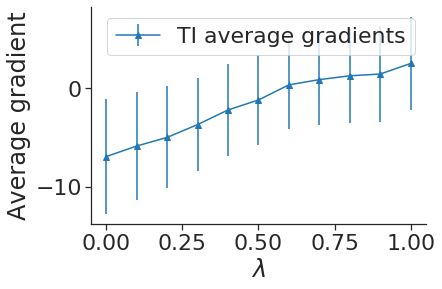

In [18]:
#plot(avg_gradient[:,0], avg_gradient[:,1], marker = 'o', label='TI')
errorbar(avg_gradient[:,0], avg_gradient[:,1], yerr=avg_gradient[:,2], marker = '^', label='TI average gradients')
xlabel(r'$\lambda$')
ylabel('Average gradient')
legend()
sbn.despine()

#### The overlap matrix

#### bound

In [21]:
!analyse_freenrg mbar -i bound/lambda-*/simfile.dat -o bound_overlap.dat --subsampling --overlap -p 90

Starting analyse_freenrg: number of threads equals 48

Simulation data is analysed using the python module pymbar
----------------------------------------------------------
# Writing all output to file bound_overlap.dat
#Lambda array was not given, trying to infer lambda values from simulation files...
working on input file bound/lambda-0.0/simfile.dat
working on input file bound/lambda-0.1/simfile.dat
working on input file bound/lambda-0.2/simfile.dat
working on input file bound/lambda-0.3/simfile.dat
working on input file bound/lambda-0.4/simfile.dat
working on input file bound/lambda-0.5/simfile.dat
working on input file bound/lambda-0.6/simfile.dat
working on input file bound/lambda-0.7/simfile.dat
working on input file bound/lambda-0.8/simfile.dat
working on input file bound/lambda-0.9/simfile.dat
working on input file bound/lambda-1.0/simfile.dat

Respecting your privacy - not sending usage statistics.
Please see http://siremol.org/analytics for more information.

#Subsampling en

#### unbound

In [22]:
!analyse_freenrg mbar -i unbound/lambda-*/simfile.dat -o unbound_overlap.dat --subsampling --overlap -p 90

Starting analyse_freenrg: number of threads equals 48

Simulation data is analysed using the python module pymbar
----------------------------------------------------------
# Writing all output to file unbound_overlap.dat
#Lambda array was not given, trying to infer lambda values from simulation files...
working on input file unbound/lambda-0.0/simfile.dat
working on input file unbound/lambda-0.1/simfile.dat
working on input file unbound/lambda-0.2/simfile.dat
working on input file unbound/lambda-0.3/simfile.dat
working on input file unbound/lambda-0.4/simfile.dat
working on input file unbound/lambda-0.5/simfile.dat
working on input file unbound/lambda-0.6/simfile.dat
working on input file unbound/lambda-0.7/simfile.dat
working on input file unbound/lambda-0.8/simfile.dat
working on input file unbound/lambda-0.9/simfile.dat
working on input file unbound/lambda-1.0/simfile.dat

Respecting your privacy - not sending usage statistics.
Please see http://siremol.org/analytics for more infor

In [23]:
#A helper function to read the overlap matrix from file
def get_overlp_matrix(filename, n_states=11):
    fh = open (filename, 'r')
    lines = fh.readlines()
    fh.close()
    count = 0
    matrix = []
    for line in lines:
        if line.startswith('#Overlap'):
            matrix = lines[(count+1):(count+1+n_states)]
            break
        count = count+1 
    for i in range(len(matrix)):
        temp = matrix[i].strip().split(' ')
        float_temp = [float(j) for j in temp]
        matrix[i] = float_temp
    matrix =np.array(matrix)
    return matrix

In [24]:
overlap_bound = get_overlp_matrix('bound_overlap.dat')
overlap_unbound = get_overlp_matrix('unbound_overlap.dat')

### Plotting the overlap matrices

Text(0.5, 1, 'Overlap matrix for bound form')

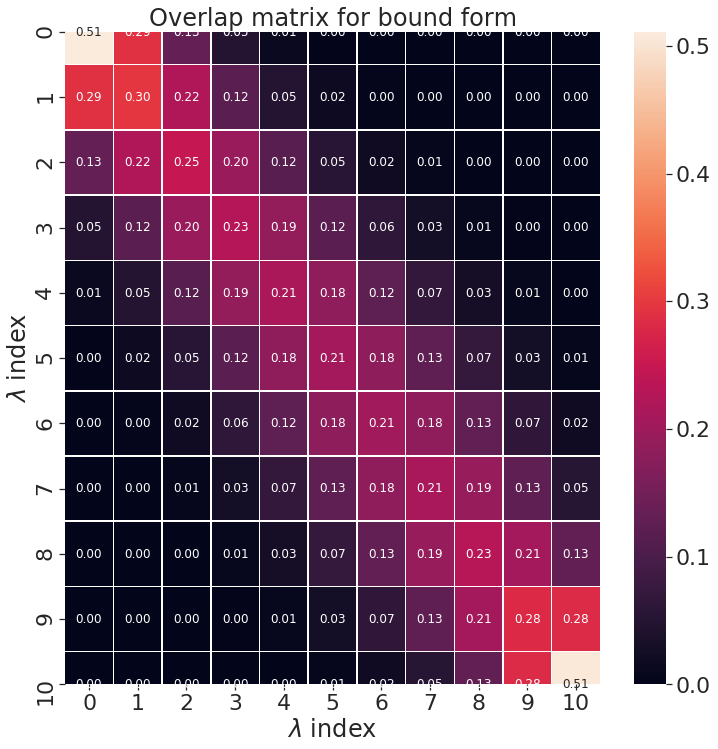

In [25]:
fig = figure(figsize=(12,12))
ax = sbn.heatmap(overlap_bound, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Overlap matrix for bound form')

Text(0.5, 1, 'Overlap matrix for unbound form')

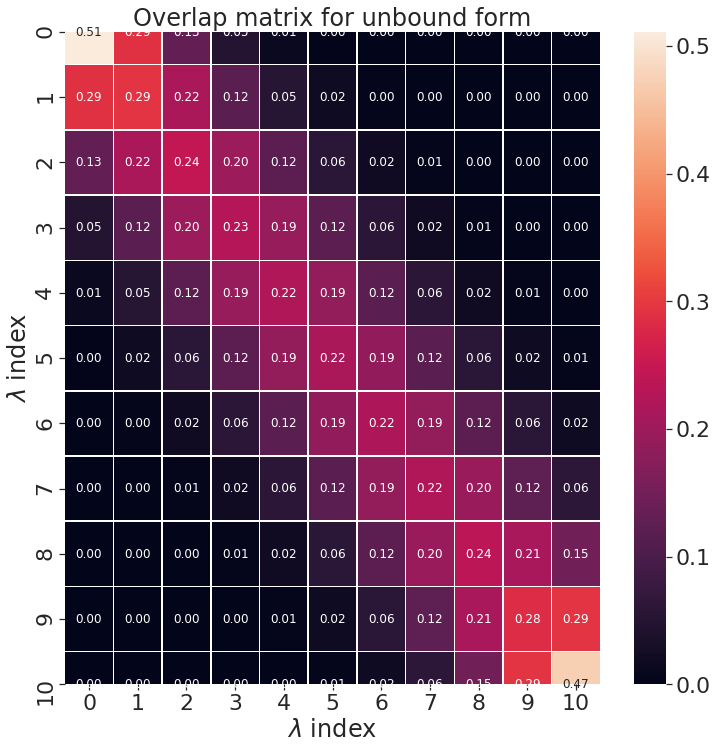

In [26]:
fig = figure(figsize=(12,12))
ax = sbn.heatmap(overlap_unbound, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Overlap matrix for unbound form')